In [5]:
!git clone https://github.com/ShikhaERAV2/ERAV2.git


Cloning into 'ERAV2'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (28/28), 16.41 KiB | 16.41 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [6]:
%cd /content/ERAV2

/content/ERAV2


In [7]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  U

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_grad_cam import GradCAM
from models.resnet import *
import matplotlib.pyplot as plt
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image,deprocess_image
import numpy as np
from main import *
#!pip install torchsummary
from torchsummary import summary
from utils import *




In [9]:
#use_cuda = torch.cuda.is_available()
device = get_device()
print(device)


cuda


In [10]:
# Define the transforms for CIFAR-10
train_transforms , test_transforms = get_transformation()


In [11]:
# Load CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=get_batch_size(), shuffle=False, num_workers=2)

# Load the CIFAR-10 test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(testset, batch_size=get_batch_size(), shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:01<00:00, 90484823.28it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [12]:
# Load your model trained on CIFAR-10
model = ResNet18().to(device)  # Load your trained model here
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [13]:
SEED=1
# For reproducibility
torch.manual_seed(SEED)

In [14]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [15]:
from main import *
EPOCHS = get_epoch()
#EPOCHS = 5
criterion = get_criterion()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0,momentum=0.9)

EPOCH -  1


  0%|          | 0/391 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train: Loss=1.4955 Batch_id=390 Accuracy=40.30: 100%|█████████▉| 390/391 [00:31<00:00, 16.15it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train: Loss=1.4955 Batch_id=390 Accuracy=40.30: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]



Test set: Average loss: -0.0035, Accuracy: 5074/10000 (50.74%)

EPOCH -  2


Train: Loss=1.1249 Batch_id=390 Accuracy=56.50: 100%|██████████| 391/391 [00:29<00:00, 13.18it/s]



Test set: Average loss: -0.0056, Accuracy: 6172/10000 (61.72%)

EPOCH -  3


Train: Loss=1.0741 Batch_id=390 Accuracy=64.63: 100%|██████████| 391/391 [00:29<00:00, 13.33it/s]



Test set: Average loss: -0.0068, Accuracy: 6668/10000 (66.68%)

EPOCH -  4


Train: Loss=0.7827 Batch_id=390 Accuracy=69.74: 100%|██████████| 391/391 [00:29<00:00, 13.07it/s]



Test set: Average loss: -0.0087, Accuracy: 7078/10000 (70.78%)

EPOCH -  5


Train: Loss=0.7090 Batch_id=390 Accuracy=73.86: 100%|██████████| 391/391 [00:29<00:00, 13.47it/s]



Test set: Average loss: -0.0093, Accuracy: 7354/10000 (73.54%)

EPOCH -  6


Train: Loss=0.6770 Batch_id=390 Accuracy=76.74: 100%|██████████| 391/391 [00:29<00:00, 13.35it/s]



Test set: Average loss: -0.0102, Accuracy: 7757/10000 (77.57%)

EPOCH -  7


Train: Loss=0.5532 Batch_id=390 Accuracy=78.99: 100%|██████████| 391/391 [00:29<00:00, 13.32it/s]



Test set: Average loss: -0.0112, Accuracy: 7522/10000 (75.22%)

EPOCH -  8


Train: Loss=0.5145 Batch_id=390 Accuracy=80.88: 100%|██████████| 391/391 [00:29<00:00, 13.31it/s]



Test set: Average loss: -0.0112, Accuracy: 7794/10000 (77.94%)

EPOCH -  9


Train: Loss=0.5010 Batch_id=390 Accuracy=82.08: 100%|██████████| 391/391 [00:29<00:00, 13.35it/s]



Test set: Average loss: -0.0113, Accuracy: 8055/10000 (80.55%)

EPOCH -  10


Train: Loss=0.4732 Batch_id=390 Accuracy=83.45: 100%|██████████| 391/391 [00:29<00:00, 13.37it/s]



Test set: Average loss: -0.0128, Accuracy: 8171/10000 (81.71%)

EPOCH -  11


Train: Loss=0.4293 Batch_id=390 Accuracy=84.57: 100%|██████████| 391/391 [00:29<00:00, 13.26it/s]



Test set: Average loss: -0.0130, Accuracy: 8288/10000 (82.88%)

EPOCH -  12


Train: Loss=0.4416 Batch_id=390 Accuracy=85.56: 100%|██████████| 391/391 [00:29<00:00, 13.25it/s]



Test set: Average loss: -0.0137, Accuracy: 8249/10000 (82.49%)

EPOCH -  13


Train: Loss=0.3708 Batch_id=390 Accuracy=86.40: 100%|██████████| 391/391 [00:29<00:00, 13.32it/s]



Test set: Average loss: -0.0137, Accuracy: 8295/10000 (82.95%)

EPOCH -  14


Train: Loss=0.3793 Batch_id=390 Accuracy=87.35: 100%|██████████| 391/391 [00:29<00:00, 13.30it/s]



Test set: Average loss: -0.0143, Accuracy: 8389/10000 (83.89%)

EPOCH -  15


Train: Loss=0.3284 Batch_id=390 Accuracy=87.92: 100%|██████████| 391/391 [00:29<00:00, 13.40it/s]



Test set: Average loss: -0.0140, Accuracy: 8446/10000 (84.46%)

EPOCH -  16


Train: Loss=0.2946 Batch_id=390 Accuracy=88.53: 100%|██████████| 391/391 [00:29<00:00, 13.37it/s]



Test set: Average loss: -0.0150, Accuracy: 8395/10000 (83.95%)

EPOCH -  17


Train: Loss=0.2891 Batch_id=390 Accuracy=89.01: 100%|██████████| 391/391 [00:29<00:00, 13.31it/s]



Test set: Average loss: -0.0145, Accuracy: 8519/10000 (85.19%)

EPOCH -  18


Train: Loss=0.3221 Batch_id=390 Accuracy=89.71: 100%|██████████| 391/391 [00:29<00:00, 13.25it/s]



Test set: Average loss: -0.0157, Accuracy: 8451/10000 (84.51%)

EPOCH -  19


Train: Loss=0.2297 Batch_id=390 Accuracy=90.16: 100%|██████████| 391/391 [00:29<00:00, 13.08it/s]



Test set: Average loss: -0.0163, Accuracy: 8508/10000 (85.08%)

EPOCH -  20


Train: Loss=0.2412 Batch_id=390 Accuracy=90.53: 100%|██████████| 391/391 [00:29<00:00, 13.16it/s]



Test set: Average loss: -0.0159, Accuracy: 8608/10000 (86.08%)



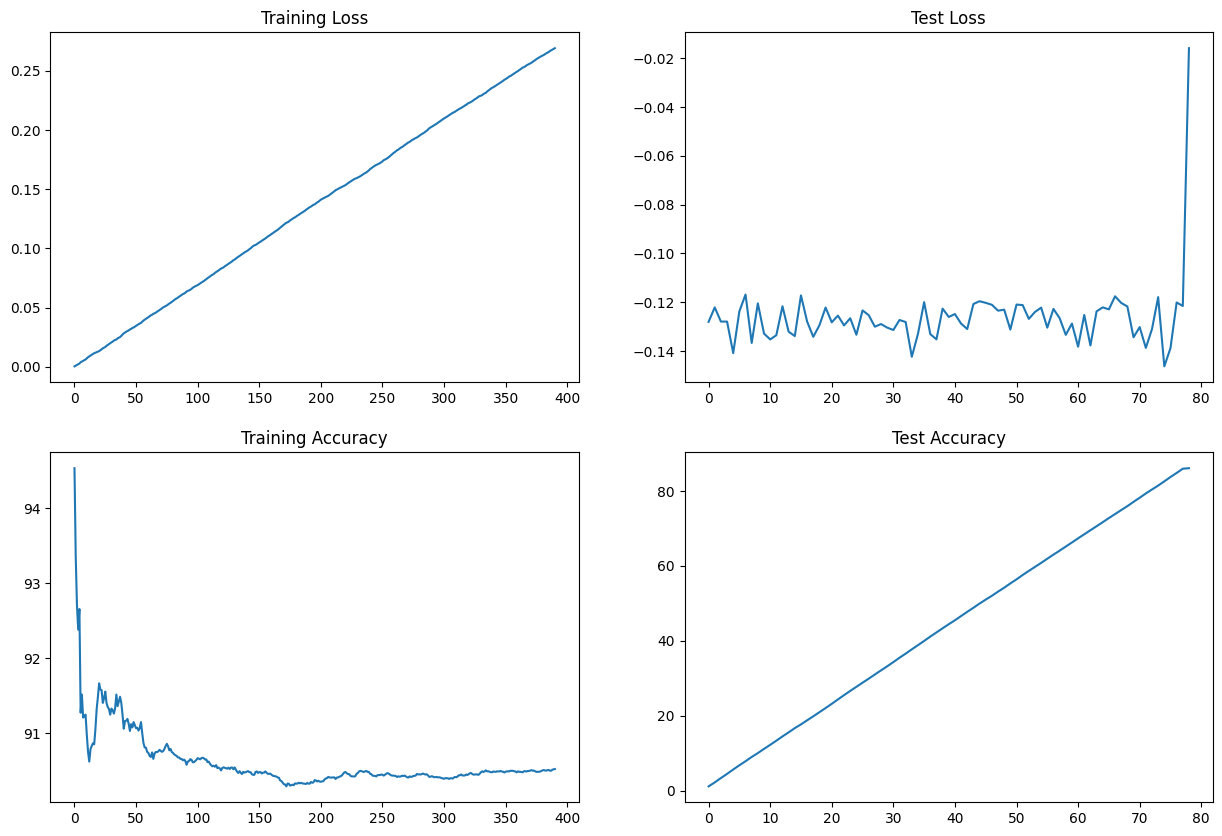

In [16]:
# Train the model
# Assuming you have defined your model, train_loader, test_loader, optimizer, and device elsewhere in your code
from main import train_model,test_model
from models import ModelTrainer

#res_model =  ResNet_Custom().to(device)
# Instantiate the ModelTrainer class
#trainer = ModelTrainer()

# Train the model
for epoch in range(EPOCHS):
    print("EPOCH - ",epoch+1)
    #trainer.train(model, device, train_loader, optimizer, epoch,criterion)
    train_losses,train_acc = train_model(model, device, train_loader, optimizer, epoch,criterion)

    # Test the trained model
    #trainer.test(res_model, device, test_loader)
    test_losses,test_acc = test_model(model, device, test_loader)


display_plot(train_losses,train_acc,test_losses,test_acc)

In [17]:
print(train_losses,train_acc,test_losses,test_acc)

[0.0003541541450163897, 0.0009646494980053524, 0.0015666825539620635, 0.0021674541561195002, 0.0027401955688700955, 0.003851311514749551, 0.0044099211006823095, 0.004929258466681556, 0.005608909651446526, 0.0061934901701519865, 0.0071834775874072025, 0.008077067220607376, 0.008792824185717746, 0.00944896553026136, 0.01017333033597073, 0.010803590726364604, 0.011476976792220874, 0.011911811845381851, 0.01232965130482793, 0.012761155662634183, 0.013221786188347566, 0.014024016383054007, 0.014706287580682799, 0.015623357251781942, 0.016179265459175304, 0.016721073090267914, 0.01774801919832254, 0.018396879477269205, 0.019217108216736934, 0.019936205557240246, 0.02055902115981597, 0.02127213509338896, 0.022141456413451974, 0.02266718226168162, 0.023007673490077943, 0.02401709888139954, 0.024546849491346216, 0.02509882234398971, 0.02615178298309941, 0.02732096711540466, 0.02827885339174734, 0.02887873454471988, 0.029655492595394555, 0.030145662367496343, 0.030714245517845348, 0.031554922690

In [18]:
import importlib
imported_module = importlib.import_module("utils")
importlib.reload(imported_module)

from utils import *

misclassified_images = get_misclassified_images(test_loader,classes,model,device)

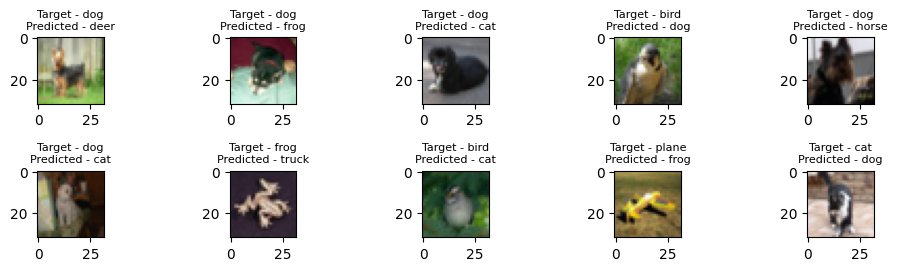

In [19]:
display_misclassified_images(misclassified_images[:10],classes)

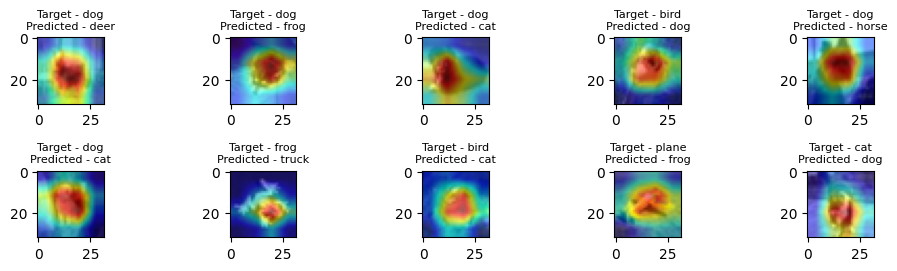

In [20]:
# Select the target layer
target_layer = [model.layer4[-1]]  # Choose the target layer name or index

display_gradcam_images(model,misclassified_images,device,classes,target_layer)

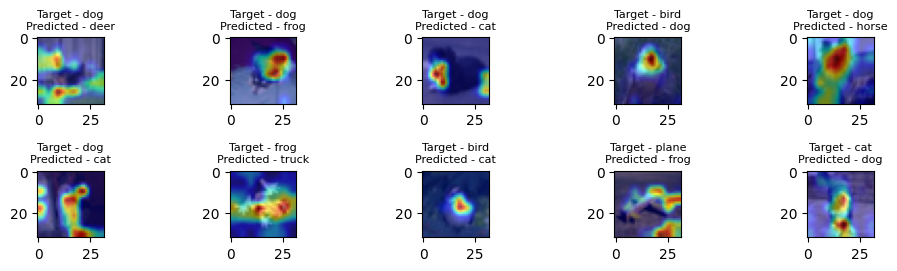

In [21]:
# Select the target layer
target_layer = [model.layer3[-1]]  # Choose the target layer name or index

display_gradcam_images(model,misclassified_images,device,classes,target_layer)